# Exploratory Data Analysis - Quantidade de Alunos
Quantidade de alunos por classe

#### Imports

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from unidecode import unidecode

pd.set_option('display.max_columns', None)

## Carregar dados

In [2]:
PATH = '../data/raw'

### Dados das Classes

In [3]:
data = pd.read_csv(os.path.join(PATH, '10_Escolas_Classes_Qtde_Alunos.csv'), sep=';')
print(data.shape)
data.head()

(803941, 18)


,ANO,NOMEDEP,DE,MUN,DISTR,COD_ESC,NOMESC,TIPOESC,TIPOESC_DESC,SITUACAO,CLASSE,TIPOCLASSE,TIPOCLASSE_DESC,GRAU,TipoEnsino,SERIE,QTDE_ALUNOS,CODVINC
0,2014,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,30806,HELEN KELLER,8,EE,Ativa,182570713,0,CLASSE COMUM,1,ENSINO FUNDAMENTAL DE 8 ANOS,8,21,NaN
1,2014,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,30806,HELEN KELLER,8,EE,Ativa,182570762,0,CLASSE COMUM,2,ENSINO MEDIO,2,37,NaN
2,2014,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,30806,HELEN KELLER,8,EE,Ativa,186061859,1,CLASSE MULTISSERIADA,5,EJA ENSINO MÉDIO,10,25,NaN
3,2014,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,31045,DURVALINO GRION PROF,8,EE,Ativa,182570440,0,CLASSE COMUM,2,ENSINO MEDIO,2,26,NaN
4,2014,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,31045,DURVALINO GRION PROF,8,EE,Ativa,182570465,0,CLASSE COMUM,2,ENSINO MEDIO,3,33,NaN


### Filtrar apenas dados de 2018

In [4]:
data = data[data['ANO'] == 2018]
data.shape

(127436, 18)

### Tipos de classes

In [5]:
data['TIPOCLASSE_DESC'].value_counts()

CLASSE COMUM                                 113698
CLASSE MULTISSERIADA                           6045
CLASSE DE SALA DE RECURSOS                     4513
CLASSE DE EF/EM INTEGRAL                       1618
CLASSE DA ED. ESPECIAL ITINERANTE               712
RC-RCI - RECUPERACAO CONTINUA E INTENSIVA       219
RC - RECUPERACAO INTENSIVA DE CICLO             157
RECUPERAÇÃO INTENSIVA - REDE ESTADUAL-SE        113
CLASSE DE RECUPERACAO DE CICLO                  101
ENSINO MEDIO ARTICULADO                          74
CLASSE DE SALA DE RECURSOS MULTIFUNCIONAL        20
CLASSE PIC                                        9
Name: TIPOCLASSE_DESC, dtype: int64

## Agregação por escola

### Quantidade de alunos na escola

In [6]:
qtd_alunos_escola = data.groupby(['COD_ESC'])['QTDE_ALUNOS'].sum()
qtd_alunos_escola.name = 'QTD_TOTAL_ALUNOS'

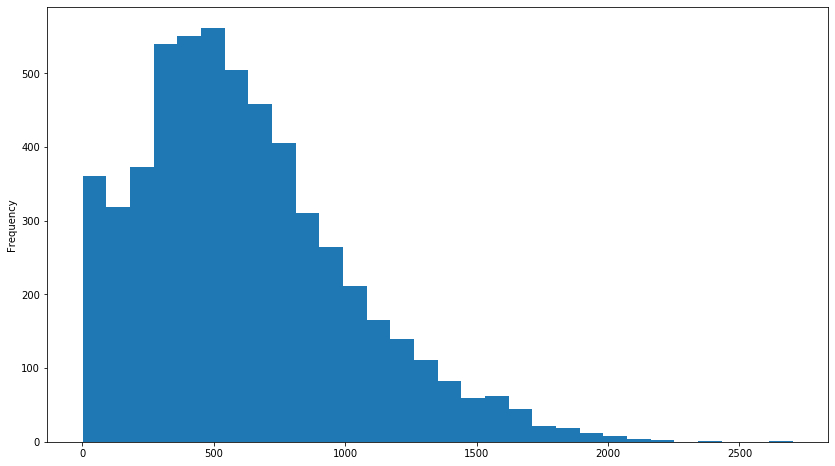

In [7]:
qtd_alunos_escola.plot(kind='hist', bins=30, figsize=(14,8))

### Quantidade de classes

In [8]:
qtd_classes = data.groupby(['COD_ESC']).size()
qtd_classes.name = 'QTD_CLASSES'

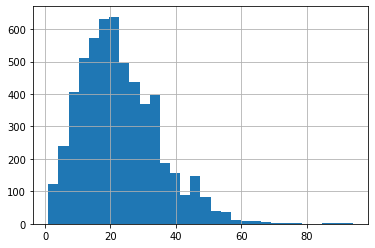

In [9]:
qtd_classes.hist(bins=30)

### Quantidade média de alunos por classe

In [10]:
media_alunos_classe = data.groupby(['COD_ESC'])['QTDE_ALUNOS'].mean()
media_alunos_classe.name = 'MEDIA_ALUNOS_SALA'

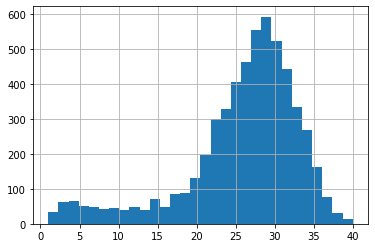

In [11]:
media_alunos_classe.hist(bins=30)

### Agregação de acordo com o tipo de ensino
Deixar apenas as principais classes

In [12]:
data['TipoEnsino'].value_counts(normalize=True) * 100

ENSINO FUNDAMENTAL DE 9 ANOS                   52.383157
ENSINO MEDIO                                   30.878245
EJA ENSINO MÉDIO                                4.067924
EDUCACAO ESPECIAL - DM                          3.318529
CEL                                             2.642111
EDUCAÇÃO COMPLEMENTAR                           2.280360
EJA ENSINO FUNDAMENTAL 5ª A 8ª                  1.734204
ENSINO FUNDAMENTAL (6º ANO A 9º ANO) - CASA     0.707022
EJA ENSINO FUNDAMENTAL 1ª A 4ª                  0.560281
ENSINO MÉDIO - CASA                             0.381368
ESPECTRO DO AUTISMO                             0.284064
EDUCACAO ESPECIAL - DA                          0.272294
EDUCACAO ESPECIAL - DV                          0.175775
ENSINO FUNDAMENTAL (1º ANO A 5º ANO) - CASA     0.112213
PROJETO EXPLORANDO CURRÍCULO - PEC              0.102012
EDUCACAO ESPECIAL - DF                          0.066700
EDUCACAO INFANTIL                               0.029034
SALA DE RECURSO ALTAS HABILIDAD

### Quantidade de classe por tipo de ensido

In [13]:
qtd_classes_tipo = data.groupby(['COD_ESC', 'TipoEnsino']).size().unstack()[['ENSINO FUNDAMENTAL DE 9 ANOS', 'ENSINO MEDIO']]
qtd_classes_tipo.columns = 'QTD_CLASSES_TIPO_' + qtd_classes_tipo.columns
qtd_classes_tipo.fillna(0, inplace=True)
qtd_classes_tipo.head()

TipoEnsino,QTD_CLASSES_TIPO_ENSINO FUNDAMENTAL DE 9 ANOS,QTD_CLASSES_TIPO_ENSINO MEDIO
COD_ESC,,
12,16.0,0.0
24,34.0,40.0
36,34.0,29.0
48,0.0,35.0
59,0.0,28.0


### Quantidade de alunos por tipo de ensino

In [14]:
qtd_alunos_tipo = data.groupby(['COD_ESC', 'TipoEnsino'])['QTDE_ALUNOS'].sum().unstack()[['ENSINO FUNDAMENTAL DE 9 ANOS', 'ENSINO MEDIO']]
qtd_alunos_tipo.columns = 'QTD_ALUNOS_TIPO_' + qtd_alunos_tipo.columns
qtd_alunos_tipo.fillna(0, inplace=True)
qtd_alunos_tipo.head()

TipoEnsino,QTD_ALUNOS_TIPO_ENSINO FUNDAMENTAL DE 9 ANOS,QTD_ALUNOS_TIPO_ENSINO MEDIO
COD_ESC,,
12,563.0,0.0
24,956.0,1229.0
36,1189.0,945.0
48,0.0,1189.0
59,0.0,974.0


## Juntar características

In [15]:
df_escolas = pd.concat([qtd_alunos_escola, qtd_classes, media_alunos_classe, qtd_classes_tipo, qtd_alunos_tipo], axis=1)

In [16]:
df_escolas.reset_index(inplace=True)
df_escolas.dropna(inplace=True)

In [17]:
df_escolas.head()

,COD_ESC,QTD_TOTAL_ALUNOS,QTD_CLASSES,MEDIA_ALUNOS_SALA,QTD_CLASSES_TIPO_ENSINO FUNDAMENTAL DE 9 ANOS,QTD_CLASSES_TIPO_ENSINO MEDIO,QTD_ALUNOS_TIPO_ENSINO FUNDAMENTAL DE 9 ANOS,QTD_ALUNOS_TIPO_ENSINO MEDIO
0,12,563,16,35.187500,16.0,0.0,563.0,0.0
1,24,2703,88,30.715909,34.0,40.0,956.0,1229.0
2,36,2164,69,31.362319,34.0,29.0,1189.0,945.0
3,48,1189,35,33.971429,0.0,35.0,0.0,1189.0
4,59,974,28,34.785714,0.0,28.0,0.0,974.0


## Exportar dados

In [18]:
df_escolas.to_csv('../data/processed/alunos_classes.csv', index=False)